# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

Importing the dataset

In [2]:
diabetes = 'diabetes.csv'

In [73]:
db_table = pd.read_csv(diabetes)
db_table.shape

(768, 9)

In [8]:
db_table.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Peforming Exploratory Data Analysis on the dataset

In [12]:
#Checking for missing values
missing_values = db_table.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [15]:
#Basic descriptive statistics for each predictor variable by Outcome (diabetic vs. non-diabetic)
outcome_stats = db_table.groupby('Outcome').describe()
outcome_stats

Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   268.0   

                     ... DiabetesPedigreeFunction           Age             \
               mean  ...                      75%    max  count       mean   
Outcome              ...                                                     
0        109.980000  ...                  0.56175  2.329  500.0  31.190000   
1        141.257463  ...                  0.72800  2.420  268.0  37.067164   

                                                  
               std   min   25%   50%   75%   max  
Outcome                                           
0        11.667655  21.0  23.0  27.0  37.0  81.0  
1        10.968254  21.0  28.0  36.0  44.0  70.0  

[2 rows x 64 columns]

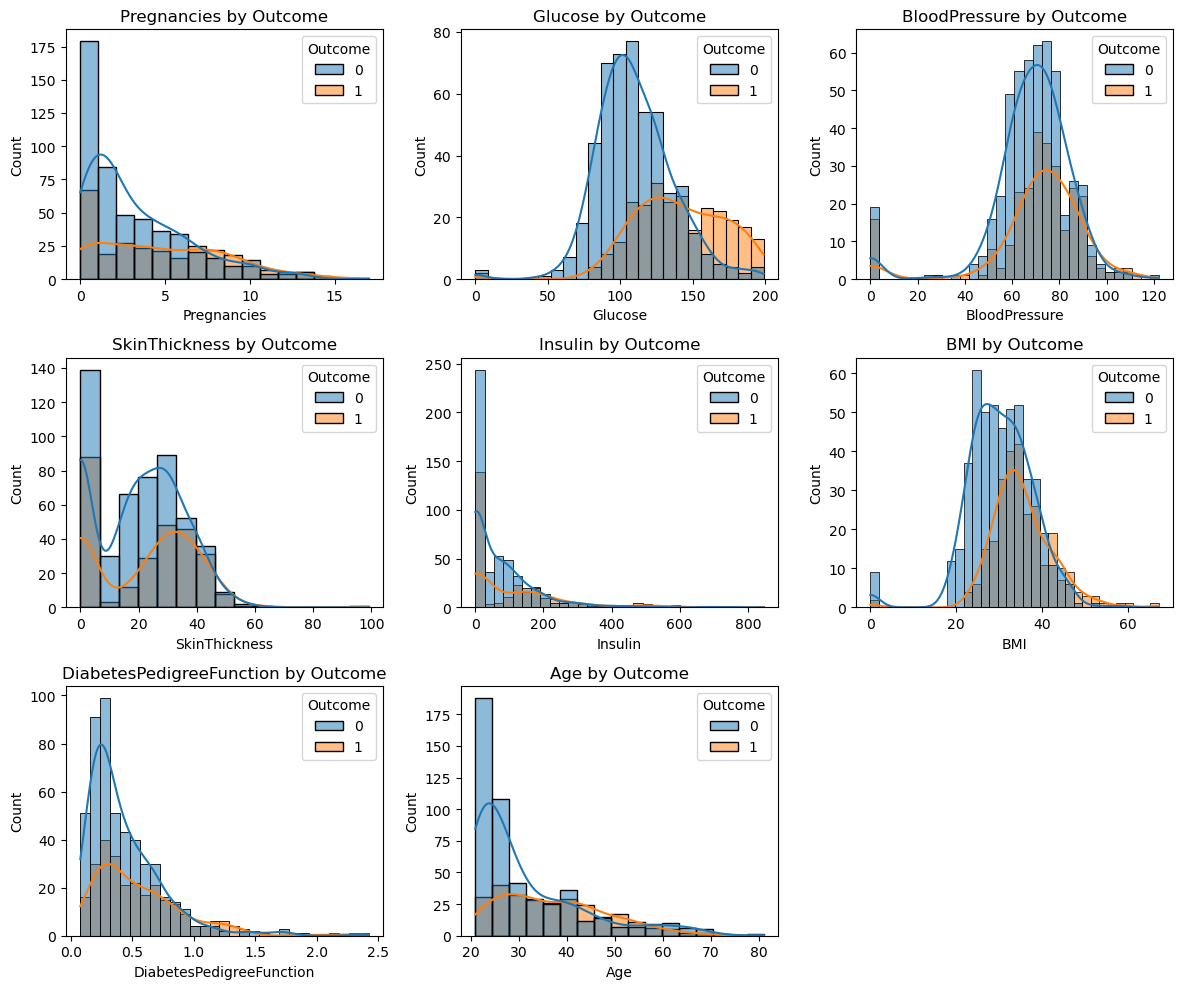

In [17]:
#Subplots using histograms of each predictor variable by Outcome to understand relationship between the predictor variables and outcome variable
plt.figure(figsize=(12, 10))

for i, column in enumerate(db_table.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=column, hue='Outcome', kde=True)
    plt.title(f'{column} by Outcome')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

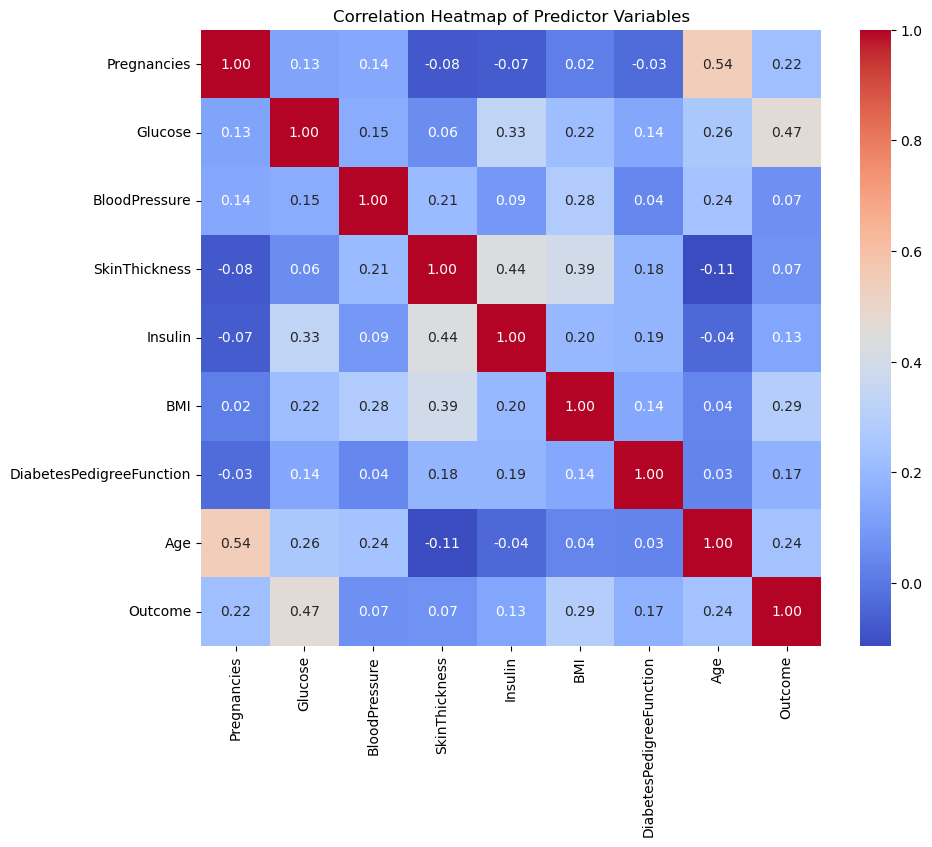

In [23]:
#Using a heat map to to understand the correlation between the predictor variables

correlation = db_table.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Predictor Variables')
plt.show()

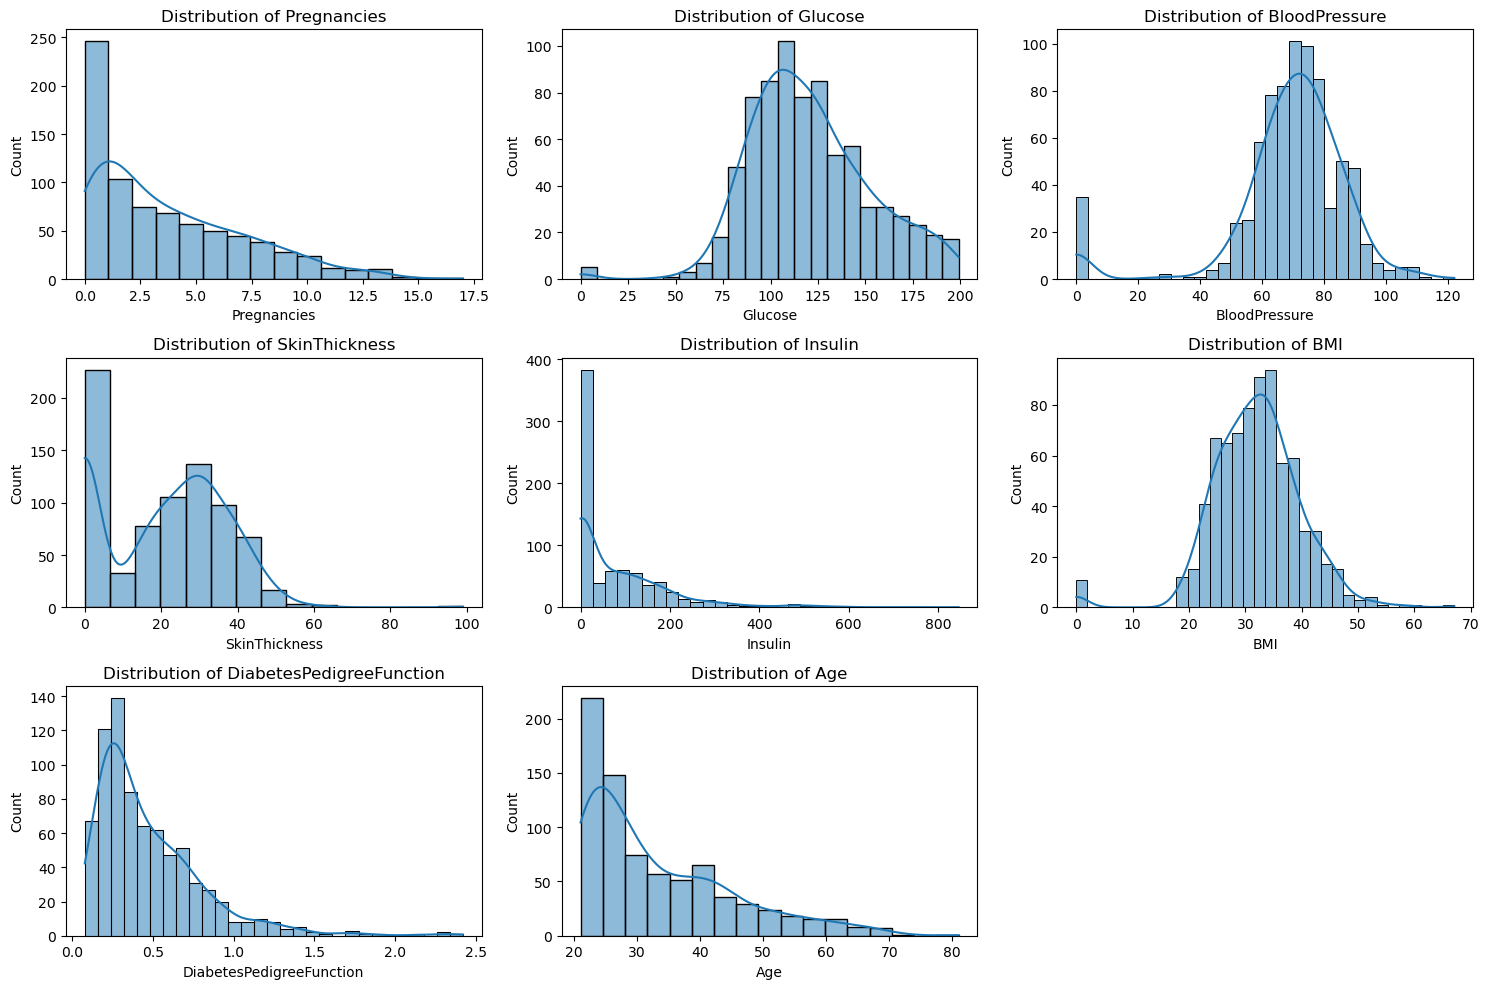

In [21]:
#Subplots using histograms of each predictor variable to understand the distribution of each predictor variable
predictor_count = len(db_table.columns) - 1
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, column in enumerate(db_table.columns[:-1]):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    sns.histplot(data=df, x=column, kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    
for i in range(predictor_count, 9):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

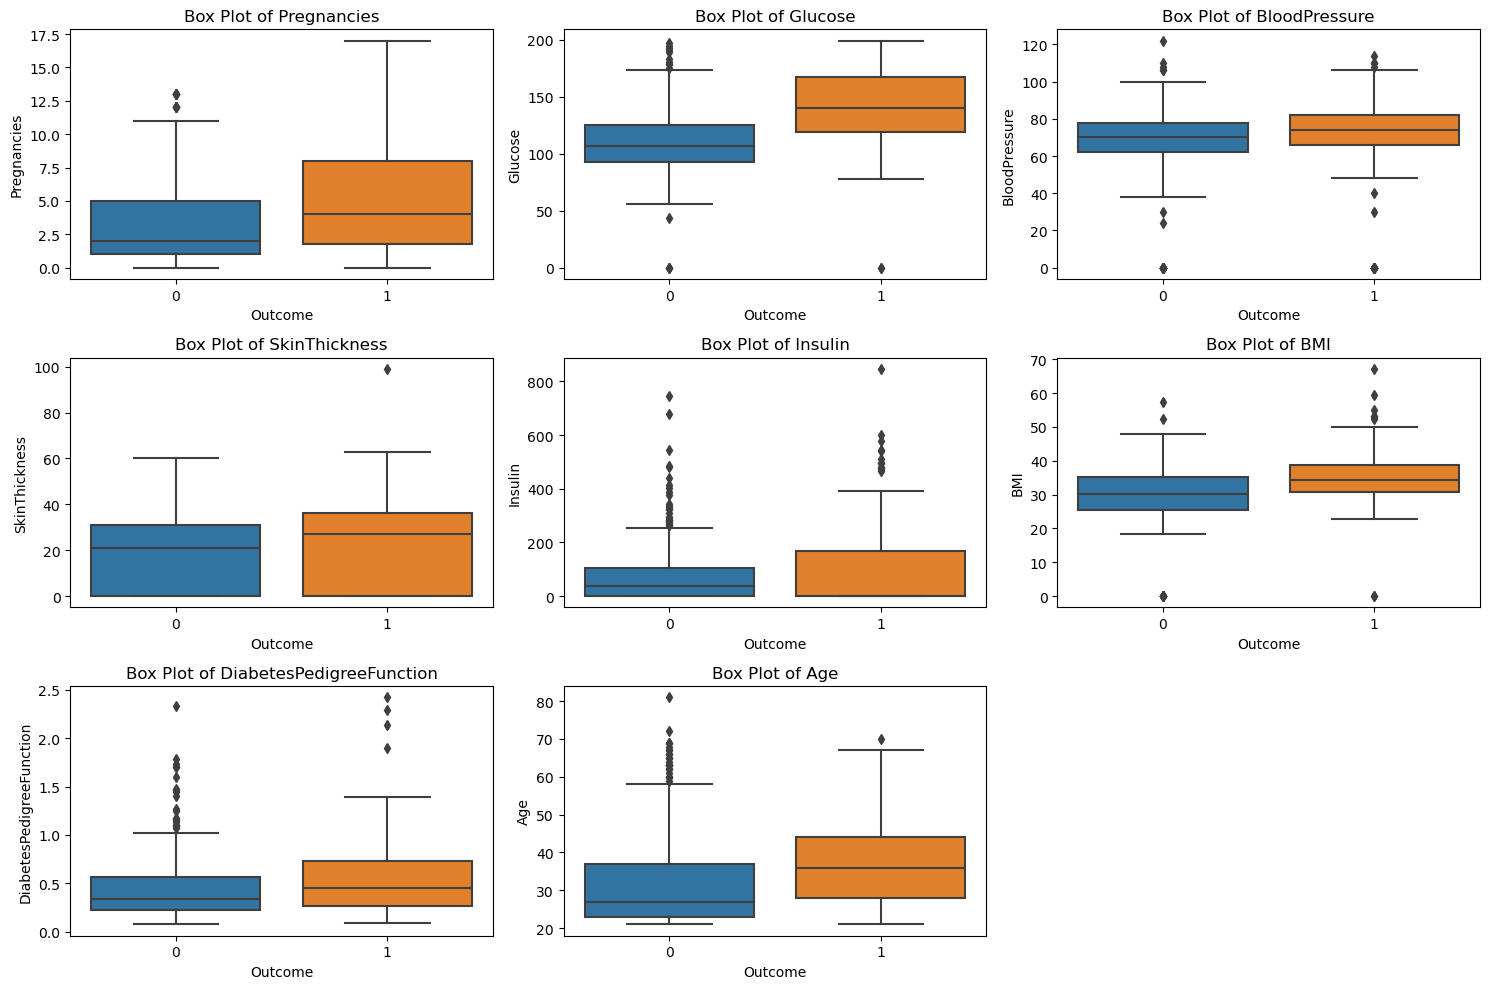

In [24]:
#Subplots using box plots of each predictor variable to understand if there are any outliers in the predictor variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(db_table.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    
    sns.boxplot(x='Outcome', y=column, data=df)
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Outcome')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

C:\Users\paula\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


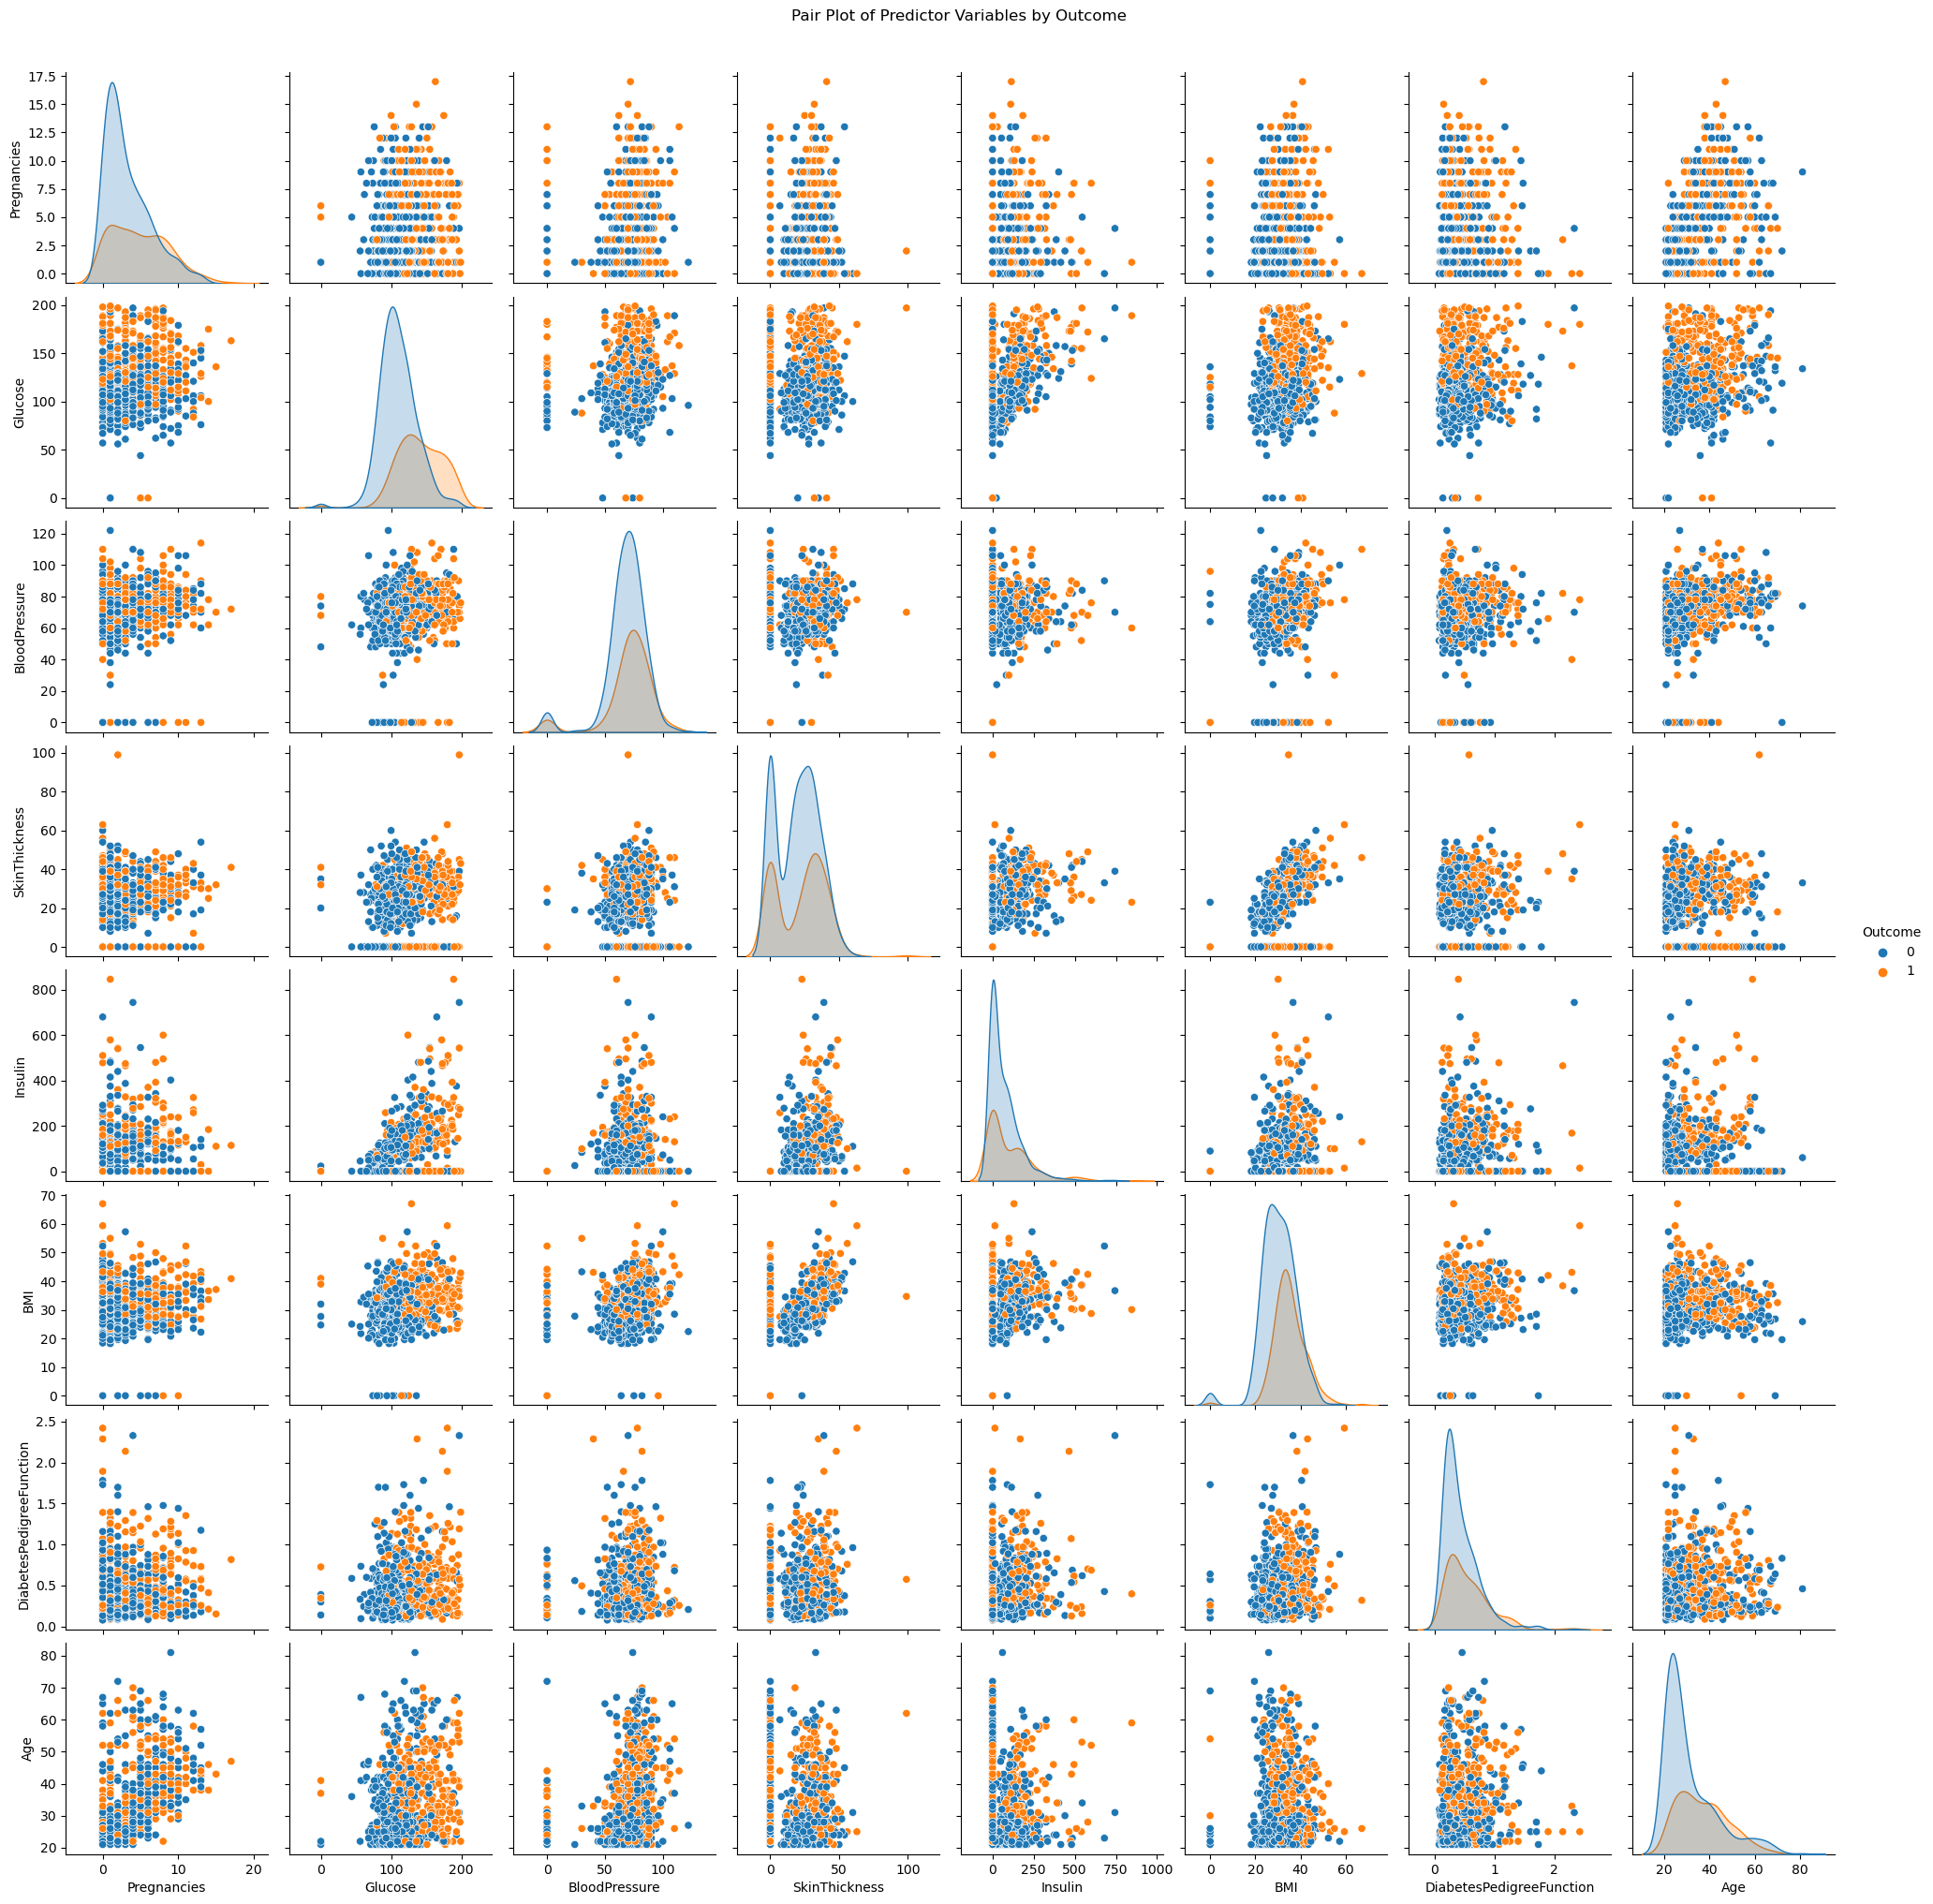

In [25]:
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.suptitle('Pair Plot of Predictor Variables by Outcome', y=1.02)
plt.show()

In [116]:
#Average age of the individuals

average_age = db_table.groupby('Outcome')['Age'].mean()
average_age

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64

In [43]:
#Average glucose levels of individuals, grouped by with diabetes or without diabetes

average_glucose = db_table.groupby('Outcome')['Glucose'].mean()
average_glucose

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64

In [44]:
#Average BMI levels of individuals, grouped by with diabetes or without diabetes

average_bmi = db_table.groupby('Outcome')['BMI'].mean()
average_bmi

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [57]:
#Using Z-scores to remove outliers

z_score = stats.zscore(db_table)
threshold = 3
outlier = (abs(z_score) > threshold).any(axis=1)
db_no_outliers = db_table[~outlier]

In [66]:
db_no_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Glucose_Interact,BMI_DiabetesPedigree_Interact
0,6,148,72,35,0,33.6,0.627,50,1,7400,21.0672
1,1,85,66,29,0,26.6,0.351,31,0,2635,9.3366
2,8,183,64,0,0,23.3,0.672,32,1,5856,15.6576
3,1,89,66,23,94,28.1,0.167,21,0,1869,4.6927
5,5,116,74,0,0,25.6,0.201,30,0,3480,5.1456
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,6363,5.6259
764,2,122,70,27,0,36.8,0.340,27,0,3294,12.5120
765,5,121,72,23,112,26.2,0.245,30,0,3630,6.4190
766,1,126,60,0,0,30.1,0.349,47,1,5922,10.5049


In [70]:
#Carrying out Normalization on the dataset
scaler = MinMaxScaler()
predictor_variables = db_no_outliers.drop('Outcome', axis=1)
diabetes_table = scaler.fit_transform(predictor_variables)
db_table_normalized = pd.DataFrame(diabetes_table, columns=predictor_variables.columns)
db_table_normalized

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age_Glucose_Interact,BMI_DiabetesPedigree_Interact
0,0.461538,0.675325,0.489796,0.583333,0.000000,0.418478,0.402788,0.617021,0.687166,0.368053
1,0.076923,0.266234,0.428571,0.483333,0.000000,0.228261,0.200293,0.212766,0.156306,0.142224
2,0.615385,0.902597,0.408163,0.000000,0.000000,0.138587,0.435803,0.234043,0.515152,0.263911
3,0.076923,0.292208,0.428571,0.383333,0.226506,0.269022,0.065297,0.000000,0.070967,0.052823
4,0.384615,0.467532,0.510204,0.000000,0.000000,0.201087,0.090242,0.191489,0.250446,0.061542
...,...,...,...,...,...,...,...,...,...,...
672,0.769231,0.370130,0.530612,0.800000,0.433735,0.399457,0.068232,0.893617,0.571635,0.070789
673,0.153846,0.506494,0.469388,0.450000,0.000000,0.505435,0.192223,0.127660,0.229724,0.203355
674,0.384615,0.500000,0.489796,0.383333,0.269880,0.217391,0.122524,0.191489,0.267157,0.086057
675,0.076923,0.532468,0.367347,0.000000,0.000000,0.323370,0.198826,0.553191,0.522504,0.164716


In [74]:
db_table_normalized['Outcome'] = db_table['Outcome']
db_table_normalized

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age_Glucose_Interact,BMI_DiabetesPedigree_Interact,Outcome
0,0.461538,0.675325,0.489796,0.583333,0.000000,0.418478,0.402788,0.617021,0.687166,0.368053,1
1,0.076923,0.266234,0.428571,0.483333,0.000000,0.228261,0.200293,0.212766,0.156306,0.142224,0
2,0.615385,0.902597,0.408163,0.000000,0.000000,0.138587,0.435803,0.234043,0.515152,0.263911,1
3,0.076923,0.292208,0.428571,0.383333,0.226506,0.269022,0.065297,0.000000,0.070967,0.052823,0
4,0.384615,0.467532,0.510204,0.000000,0.000000,0.201087,0.090242,0.191489,0.250446,0.061542,1
...,...,...,...,...,...,...,...,...,...,...,...
672,0.769231,0.370130,0.530612,0.800000,0.433735,0.399457,0.068232,0.893617,0.571635,0.070789,0
673,0.153846,0.506494,0.469388,0.450000,0.000000,0.505435,0.192223,0.127660,0.229724,0.203355,0
674,0.384615,0.500000,0.489796,0.383333,0.269880,0.217391,0.122524,0.191489,0.267157,0.086057,0
675,0.076923,0.532468,0.367347,0.000000,0.000000,0.323370,0.198826,0.553191,0.522504,0.164716,1


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [95]:
#Building and training a Logistic Regression model

X = db_table_normalized.drop('Outcome', axis=1)
y = db_table_normalized['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_predict = logistic_model.predict(X_test)
y_probability = logistic_model.predict_proba(X_test)[:, 1]

In [109]:
#Evaluating the Logistic Regression model

logistic_model_accuracy = accuracy_score(y_test, y_predict)
#logistic_model_precision = precision_score(y_test, y_predict)
logistic_model_recall = recall_score(y_test, y_predict)
logistic_model_f1_score = f1_score(y_test, y_predict)
logistic_model_roc_auc = roc_auc_score(y_test, y_probability)

In [102]:
#Building and training a Random Forest model

A = db_table_normalized.drop('Outcome', axis=1)
b = db_table_normalized['Outcome']

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(A_train, b_train)

b_predict = rf_model.predict(A_test)
b_probability = rf_model.predict_proba(A_test)[:, 1]

In [113]:
# Evaluate the Random Forest model
random_forest_accuracy = accuracy_score(b_test, b_predict)
random_forest_precision = precision_score(b_test, b_predict)
random_forest_recall = recall_score(b_test, b_predict)
random_forest_f1_score = f1_score(b_test, b_predict)
random_forest_roc_auc = roc_auc_score(b_test, b_probability)

In [114]:
# Print evaluation metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {logistic_model_accuracy:.2f}")
#print(f"Precision: {precision_logistic:.2f}")
print(f"Recall: {logistic_model_recall:.2f}")
print(f"F1-Score: {logistic_model_f1_score:.2f}")
print(f"ROC-AUC: {logistic_model_roc_auc:.2f}")

print("\nRandom Forest Metrics:")
print(f"Accuracy: {random_forest_accuracy:.2f}")
print(f"Precision: {random_forest_precision:.2f}")
print(f"Recall: {random_forest_recall:.2f}")
print(f"F1-Score: {random_forest_f1_score:.2f}")
print(f"ROC-AUC: {random_forest_roc_auc:.2f}")

Logistic Regression Metrics:
Accuracy: 0.64
Recall: 0.00
F1-Score: 0.00
ROC-AUC: 0.49

Random Forest Metrics:
Accuracy: 0.65
Precision: 0.56
Recall: 0.10
F1-Score: 0.17
ROC-AUC: 0.66


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

From the dataset provided, we can come to the following conclusions:
1. Our data does not have missing values but we do have outliers. About 91 rows have been removed to helo manage outliers.
2. When comparing the distribution of the predictor variables, we can see that only Skin Thickness, Blood Pressure, Glucose and BMI have a normal distribution.
3. We carried out normalization on the dataset to help scale the features of the predictive variabbles to a range of 0 to 1 while preserving the relationship between the data points and the original distribution shape.
4. After building, training, testing and evaluating the performance of the model, we can deduce that the Random Forest model performed better than the Logistric Regression model. We came to this conclusion by studying the evaluation metrics and observed that the Accuracy, Recall, F1-Score and ROC-AUC score are all higher for the Random Forest model compared to the Logistic Regression model.